In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [72]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    together
)
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D

In [5]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

# Generic expansion of root

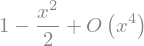

In [21]:
series(sqrt(1-x**2),x,0,4)

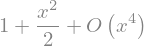

In [22]:
series(sqrt(1+x**2),x,0,4)

# Relativistic Relations

$$\gamma_0^2 = \frac{1}{1-\beta_0^2} \\
\gamma_0^2 \beta_0^2 = \frac{\beta_0^2}{1-\beta_0^2} \\
\frac{1}{\beta_0^2 \gamma_0^2} = \frac{1}{\beta_0^2}-1
$$

#  Derivation of Eq 3.2

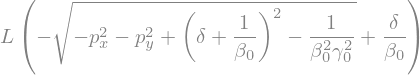

In [104]:
H0 = HamDrift6D(beta0, gamma0, L, x, px, y, py, delta)
H0

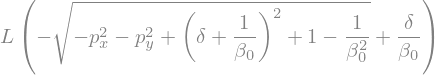

In [105]:
H1 = H0.subs(1/(beta0**2*gamma0**2),1/beta0**2-1)
H1

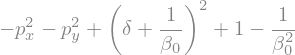

In [106]:
rootarg = H1.args[1].args[0].args[1].args[0]
rootarg

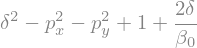

In [107]:
rootargs = simplify(rootarg)
rootargs

In [108]:
D = symbols("D")
rootargs = rootargs.subs(delta**2+2*delta/beta0+1,D)
rootargs

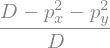

In [109]:
rootargs = rootargs/D
rootargs

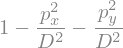

In [110]:
sub1 = list(zip([D,px,py],[1,px/D,py/D]))
rootargsp = rootargs.subs(sub1)
rootargsp

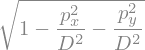

In [111]:
newroot = sqrt(rootargsp)
newroot

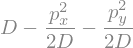

In [112]:
H33 = (D*series(newroot.subs(sub0),eps,0,4).removeO().subs(eps,1)).expand()
H33

# Derivation of Eq 3.25

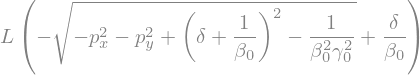

In [113]:
H0

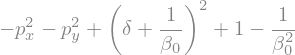

In [114]:
arg = -px**2-py**2+(delta+1/beta0)**2+1-1/beta0**2
arg

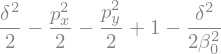

In [121]:
sub0 = list(zip([px,py,delta],[eps*px,eps*py,eps*delta]))
HA = series(sqrt(simplify(arg)).subs(sub0),eps,0,3).removeO().subs(eps,1)-delta/beta0
HA

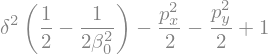

In [122]:
HA0 = HA.collect(delta**2)
HA0

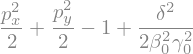

In [125]:
HA325= HA0.subs(1/beta0**2,1+1/(beta0**2*gamma0**2))
-HA325